In [1]:
import os
import scipy.io.wavfile

labeled_recording_files = os.listdir('free-spoken-digit\\dev')

wave = scipy.io.wavfile.read('free-spoken-digit\\dev\\1201_5.wav')

dataset_labeled= {}
id_label_dictionary = {}

for string in labeled_recording_files:
    wav = scipy.io.wavfile.read('free-spoken-digit\\dev\\'+string)
    #read a single file and for each of them extract info about id and label
    wav_id = string.split('_')[0]
    wav_label = string.split('_')[1].split('.')[0]
    #then insert it in the dataset
    dataset_labeled[int(wav_id)] = wav
    id_label_dictionary[int(wav_id)] = int(wav_label)
    

In [3]:
#print(wave)

In [4]:
#print(dataset_labeled[1201])

Now i verify if the array length is the same for each wav file

In [2]:
#for v, k in zip(dataset_labeled.values(), dataset_labeled.keys()):
 #   print('Data: ', len(v[1]), '  fileId: ', k)

There are several different lengths which means that the each file has a different amount of data...
BUT isn't true that more data correspond to more information, instead it could be some noise, or the audio was recorder at higher volume.
Listening the samples i heard that a sample with a data array length < 2000 is tipically not really relevant because the number pronunciation is truncated before finishing it (E.g. instead to say "six" the speaker has recorded only "si"), in the other hand a sample with length > 5500 is often (maybe always) either with noise or the speaker was screaming.


In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 2, figsize=[18,30])

ax[0,0].set_title('File 1000, "0"')
ax[0,1].set_title('File 20, "1"')
ax[1,0].set_title('File 101, "2"')
ax[1,1].set_title('File 176, "3"')
ax[2,0].set_title('File 0, "4"')
ax[2,1].set_title('File 1201, "5"')
ax[3,0].set_title('File 396, "6"')
ax[3,1].set_title('File 597, "7"')
ax[4,0].set_title('File 639, "8"')
ax[4,1].set_title('File 911, "9"')

ax[0,0].plot(dataset_labeled[1000][1])
ax[0,1].plot(dataset_labeled[20][1])
ax[1,0].plot(dataset_labeled[101][1])
ax[1,1].plot(dataset_labeled[176][1])
ax[2,0].plot(dataset_labeled[0][1])
ax[2,1].plot(dataset_labeled[1201][1])
ax[3,0].plot(dataset_labeled[396][1])
ax[3,1].plot(dataset_labeled[597][1])
ax[4,0].plot(dataset_labeled[639][1])
ax[4,1].plot(dataset_labeled[911][1])



In [3]:
'''
from numpy.fft import *
from numpy import log10, sqrt, array, zeros, ones, multiply

fig, ax = plt.subplots(5, 2, figsize=[18,30])

ax[0,0].set_title('File 1000, "0"')
ax[0,1].set_title('File 20, "1"')
ax[1,0].set_title('File 101, "2"')
ax[1,1].set_title('File 176, "3"')
ax[2,0].set_title('File 0, "4"')
ax[2,1].set_title('File 1201, "5"')
ax[3,0].set_title('File 396, "6"')
ax[3,1].set_title('File 597, "7"')
ax[4,0].set_title('File 639, "8"')
ax[4,1].set_title('File 911, "9"')

ax[0,0].plot(fft(dataset_labeled[1000][1]))
ax[0,1].plot(fft(dataset_labeled[20][1]))
ax[1,0].plot(fft(dataset_labeled[101][1]))
ax[1,1].plot(fft(dataset_labeled[176][1]))
ax[2,0].plot(fft(dataset_labeled[0][1]))
ax[2,1].plot(fft(dataset_labeled[1201][1]))
ax[3,0].plot(fft(dataset_labeled[396][1]))
ax[3,1].plot(fft(dataset_labeled[597][1]))
ax[4,0].plot(fft(dataset_labeled[639][1]))
ax[4,1].plot(fft(dataset_labeled[911][1]))
'''

'\nfrom numpy.fft import *\nfrom numpy import log10, sqrt, array, zeros, ones, multiply\n\nfig, ax = plt.subplots(5, 2, figsize=[18,30])\n\nax[0,0].set_title(\'File 1000, "0"\')\nax[0,1].set_title(\'File 20, "1"\')\nax[1,0].set_title(\'File 101, "2"\')\nax[1,1].set_title(\'File 176, "3"\')\nax[2,0].set_title(\'File 0, "4"\')\nax[2,1].set_title(\'File 1201, "5"\')\nax[3,0].set_title(\'File 396, "6"\')\nax[3,1].set_title(\'File 597, "7"\')\nax[4,0].set_title(\'File 639, "8"\')\nax[4,1].set_title(\'File 911, "9"\')\n\nax[0,0].plot(fft(dataset_labeled[1000][1]))\nax[0,1].plot(fft(dataset_labeled[20][1]))\nax[1,0].plot(fft(dataset_labeled[101][1]))\nax[1,1].plot(fft(dataset_labeled[176][1]))\nax[2,0].plot(fft(dataset_labeled[0][1]))\nax[2,1].plot(fft(dataset_labeled[1201][1]))\nax[3,0].plot(fft(dataset_labeled[396][1]))\nax[3,1].plot(fft(dataset_labeled[597][1]))\nax[4,0].plot(fft(dataset_labeled[639][1]))\nax[4,1].plot(fft(dataset_labeled[911][1]))\n'

In [3]:
import numpy as np
label_array = np.array(list(id_label_dictionary.values()))
np.unique(label_array, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([150, 150, 150, 150, 150, 150, 150, 150, 150, 150]))

As we can see our dataset is perfectly balanced

## Cleaning dataset

In [49]:
#In the following steps i will remove noisy record according with the previous considerations
clean_labeled_dataset = {}
clean_id_label_dictionary = {}

for code, wav in zip(dataset_labeled.keys(), dataset_labeled.values()):
    length = len(wav[1])
    if length < 5500 and length > 2400:
        #the wav files is good for classification, otherwise it isn't
        clean_labeled_dataset[code] = wav
        clean_id_label_dictionary[code] = id_label_dictionary[code]

In [5]:
#actually i recall again the numpy's unique function to see if the cleaned db is already balanced
label_array = np.array(list(clean_id_label_dictionary.values()))
np.unique(label_array, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([131,  67,  56,  63,  81, 121,  56, 111,  97, 138]))

Our dataset is not balanced anymore, probably we have a critical point on a label '6'


To build a classification model, i will split my cleaned data in a training and test set, but first of all i need to have all equal length array that rapresent my wav files

# Attempt using the time domain 
## Features are the mean of a given partitions

In [6]:
#this functions is aimed to calculate for each wav files, a vector which contains a number of means according 
#with the nPartitions parameter. In practise it splits the time dimension in 'nPartitions' sets which have all the same length
#Finally the function returns the result in a dictionary where a key is the original id taken from the original dataset

def compute_vector_using_mean(clean_labeled_dataset, nPartitions):
    
    X = {}
    
    for k,v in zip(clean_labeled_dataset.keys(), clean_labeled_dataset.values()):
        length = len(v[1])
        parts = []
        for i in range(1,nPartitions):
            parts.append(int(length / nPartitions * i))
            
        wav = v[1]
        mean_array = [np.mean(wav[:parts[0]])]
        for j in range(1,len(parts)-1):
            mean_array.append(np.mean(wav[parts[j]:parts[j+1]]))
            
        X[k] = np.array(mean_array)    
            
        
    return X   

X = compute_vector_using_mean(clean_labeled_dataset, 13)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(list(X.values()), 
                                                    list(clean_id_label_dictionary.values()), test_size = 0.1)

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=24, min_impurity_decrease= 0.002)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

# Evaluating results

In [9]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Compute accuracy
acc = accuracy_score(y_test, y_test_pred)
print(f"Accuracy = {acc:.2f}")

Accuracy = 0.23


I can see how ACCURANCY changes by increasing number of partitions

In [10]:
def acc_vector(boundary):
    accScores = []
    for i in range(2,boundary):
        X = compute_vector_using_mean(clean_labeled_dataset, i)
        X_train, X_test, y_train, y_test = train_test_split(list(X.values()), list(clean_id_label_dictionary.values()), test_size = 0.20)
        clf = DecisionTreeClassifier(max_depth=24, min_impurity_decrease= 0.002)

        clf.fit(X_train, y_train)
        y_test_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_test_pred)
        accScores.append(acc)
        
    return accScores   

accurancy_vector = acc_vector(20)

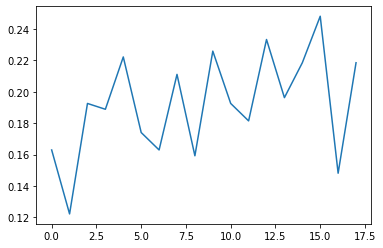

In [11]:
#%matplotlib notebook
plt.plot(accurancy_vector)

Taking into account that the function start from 2 partitions, best best accurancy vector occur when the partitions are 16

As we can see We have not a good result, let's focus now on the frequencies domain

In [15]:
'''
# Precision, recall, f1, support: for each class
p, r, f1, support = precision_recall_fscore_support(y_test, y_test_pred)

for c in range(p.shape[0]):
    print(f"\nClass {c}:")
    print(f"number of items: {support[c]}")
    print(f"p = {p[c]:.2f}")
    print(f"r = {r[c]:.2f}")
    print(f"f1 = {f1[c]:.2f}")

# Macro average f1
macro_f1 = f1.mean()
    
# This score is important when you have class imbalancing
print(f"\nF1, macro-average: {macro_f1:2f}")
'''

'\n# Precision, recall, f1, support: for each class\np, r, f1, support = precision_recall_fscore_support(y_test, y_test_pred)\n\nfor c in range(p.shape[0]):\n    print(f"\nClass {c}:")\n    print(f"number of items: {support[c]}")\n    print(f"p = {p[c]:.2f}")\n    print(f"r = {r[c]:.2f}")\n    print(f"f1 = {f1[c]:.2f}")\n\n# Macro average f1\nmacro_f1 = f1.mean()\n    \n# This score is important when you have class imbalancing\nprint(f"\nF1, macro-average: {macro_f1:2f}")\n'

# Attempt using Frequencies domain

To start i focus now on single wave file:

In [12]:
data = wave[1]
samplerate = wave[0]

print(wav, samplerate)

(8000, array([ 10,  12,   0, ..., -14, -12, -11], dtype=int16)) 8000


In [10]:
from scipy.fftpack import fft,fftfreq

In [14]:
samples = data.shape[0]

datafft = fft(data)
#Get the absolute value of real and complex component:
fftabs = abs(datafft)

In [15]:
freqs = fftfreq(samples,1/samplerate)

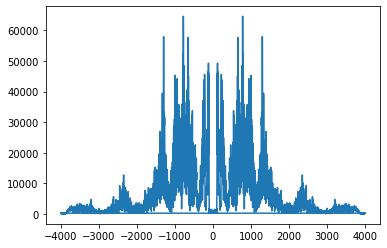

In [16]:
plt.plot(freqs,fftabs)

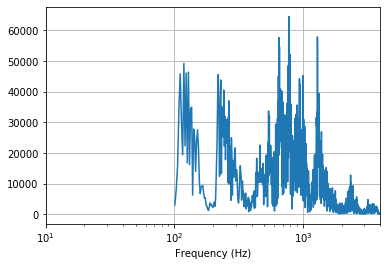

In [42]:
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[40:int(freqs.size/2)],fftabs[40:int(freqs.size/2)])

Here i can see a plot of a record of a people which says 'five', i try now to plot 10 records labeled as 'five' to see the common points

In [18]:
list_label_five = []

for k, v in zip(clean_id_label_dictionary.keys(), clean_id_label_dictionary.values()):
    if v == 9 and len(list_label_five) < 10:
        list_label_five.append(clean_labeled_dataset[k])
    

In [19]:
list_label_five

[(8000, array([-22, -13,  -8, ..., -27,  15,   9], dtype=int16)),
 (8000, array([ 3, -1,  4, ...,  7, -1, -2], dtype=int16)),
 (8000, array([  3,  11,   3, ...,  -9, -13, -14], dtype=int16)),
 (8000, array([-256,    0, -256, ..., -512, -256, -512], dtype=int16)),
 (8000, array([-256, -512, -256, ..., -512, -256, -512], dtype=int16)),
 (8000, array([155, 180, 226, ...,  78, 155, 180], dtype=int16)),
 (8000, array([ 312,  353,  389, ..., -289, -299, -302], dtype=int16)),
 (8000, array([-12,  -6,  -8, ...,  -7,  -2,   0], dtype=int16)),
 (8000, array([ 8, 10, 14, ...,  6, 17, 16], dtype=int16)),
 (8000, array([ 162,  172,  176, ..., -115, -127, -151], dtype=int16))]

In [7]:
def extract_frequencies(listOfSample):
    
    data = [v[1] for v in listOfSample]
    samplerate = [v[0] for v in listOfSample]    
    samples = [v.shape[0] for v in data]
    
    fftabs = []
    
    for v in data:
        fftabs.append(abs(fft(v)))
        
    freqs = []
    for sam, rate in zip(samples, samplerate):
        freqs.append(fftfreq(sam,1/rate))
    
    #plotting
    for i in range(len(data)):
        fig, ax = plt.subplots(figsize = (20,10))
        plt.title('Nine spoken')
        plt.xlim( [10, samplerate[i]/2] )
        plt.xscale( 'log' )
        plt.grid( True )
        plt.xlabel( 'Frequency (Hz)' )
        ax.plot(freqs[i][:int(freqs[i].size/2)],fftabs[i][:int(freqs[i].size/2)], label = i)
        ax.legend()
        fig.savefig("Png_lab7\\Nine_"+str(i)+".png")
    
    
    
      

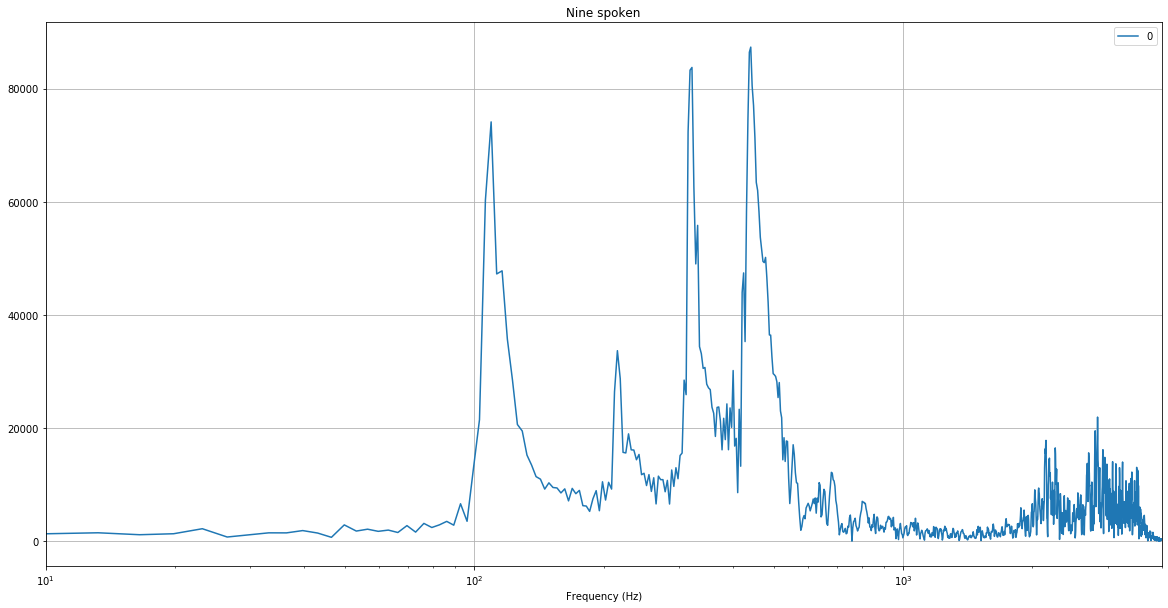

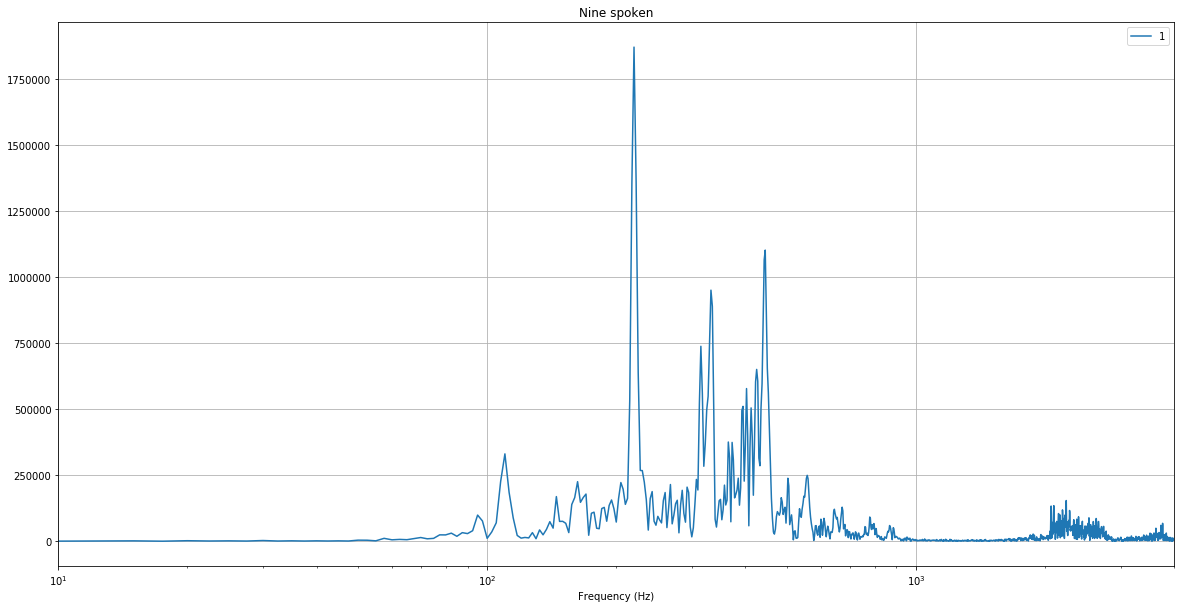

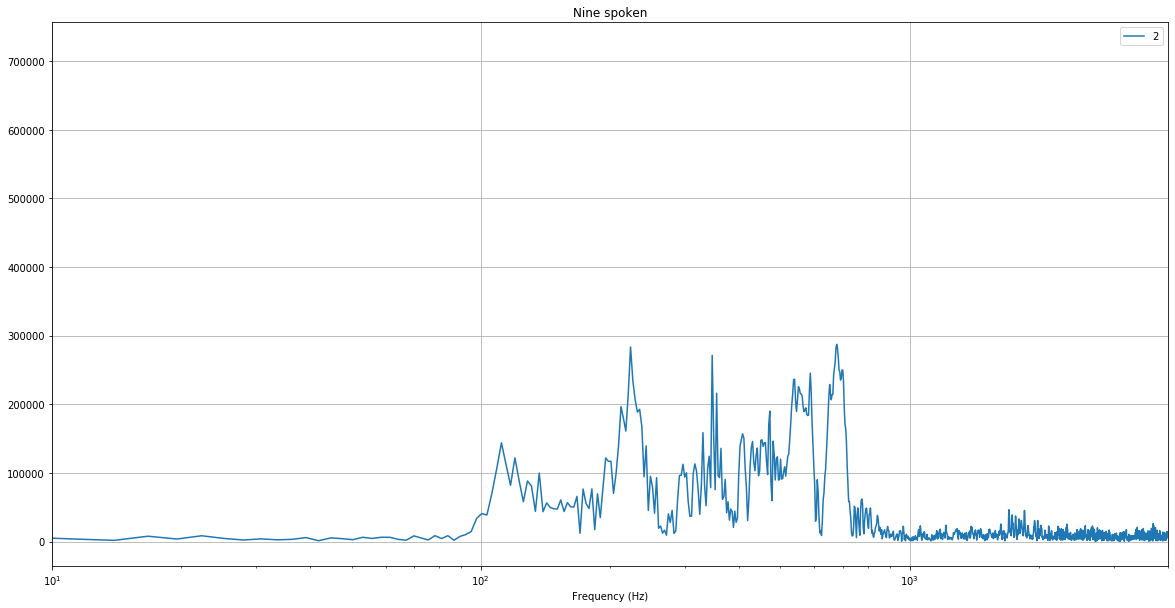

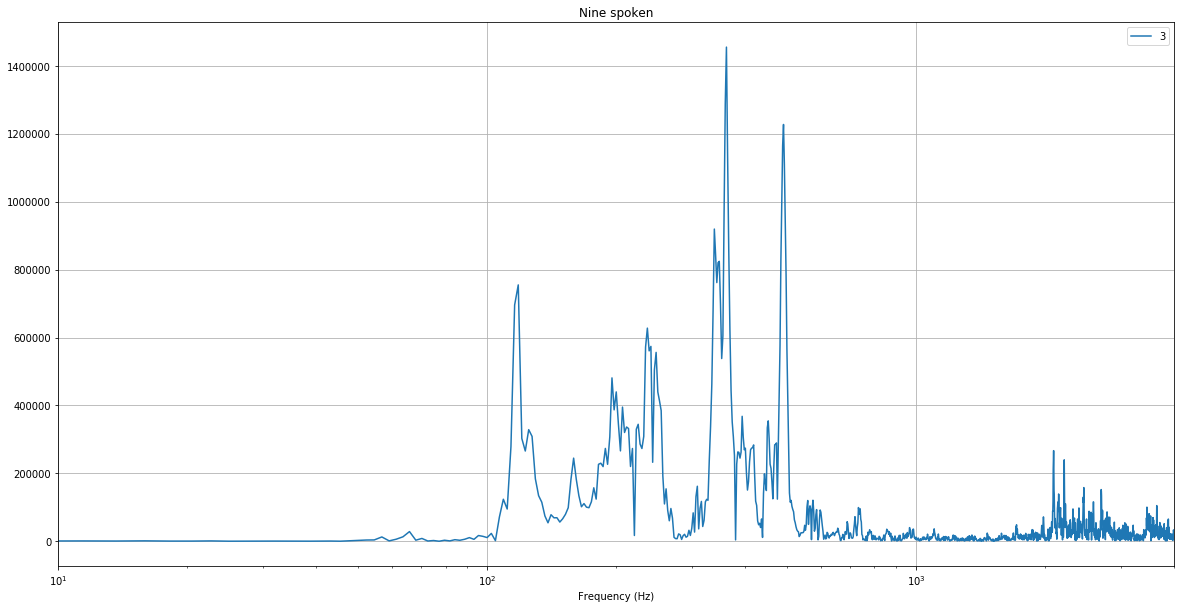

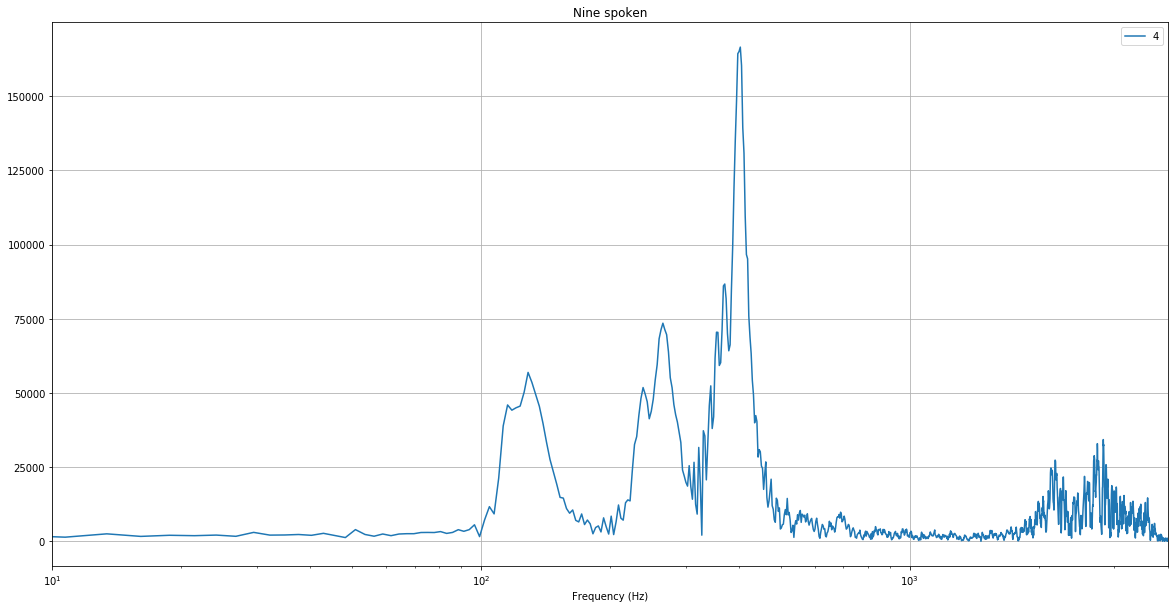

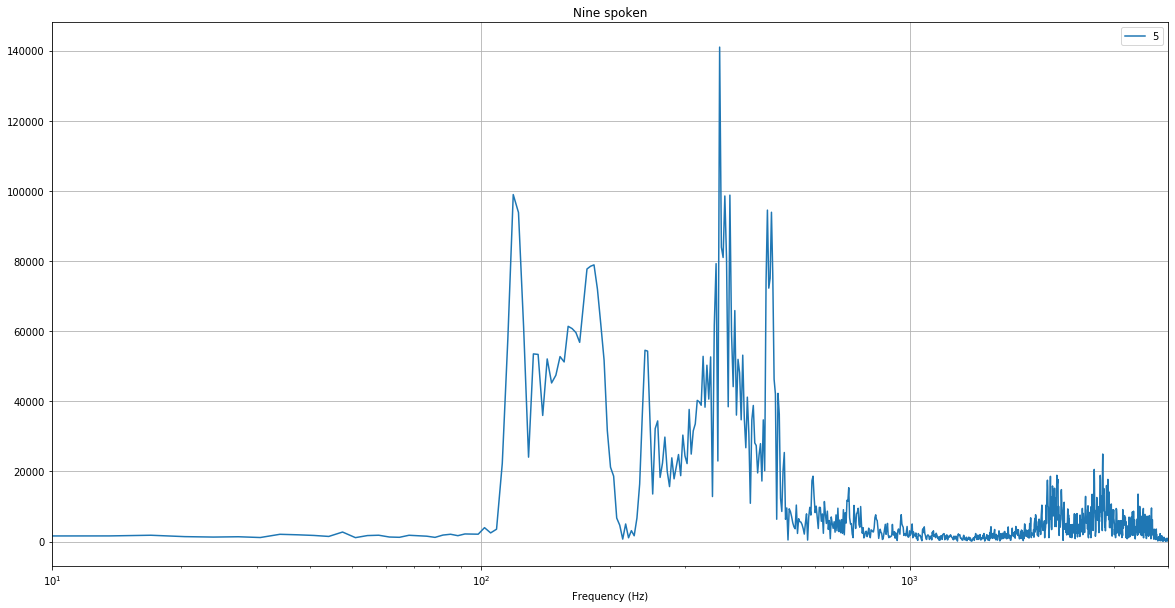

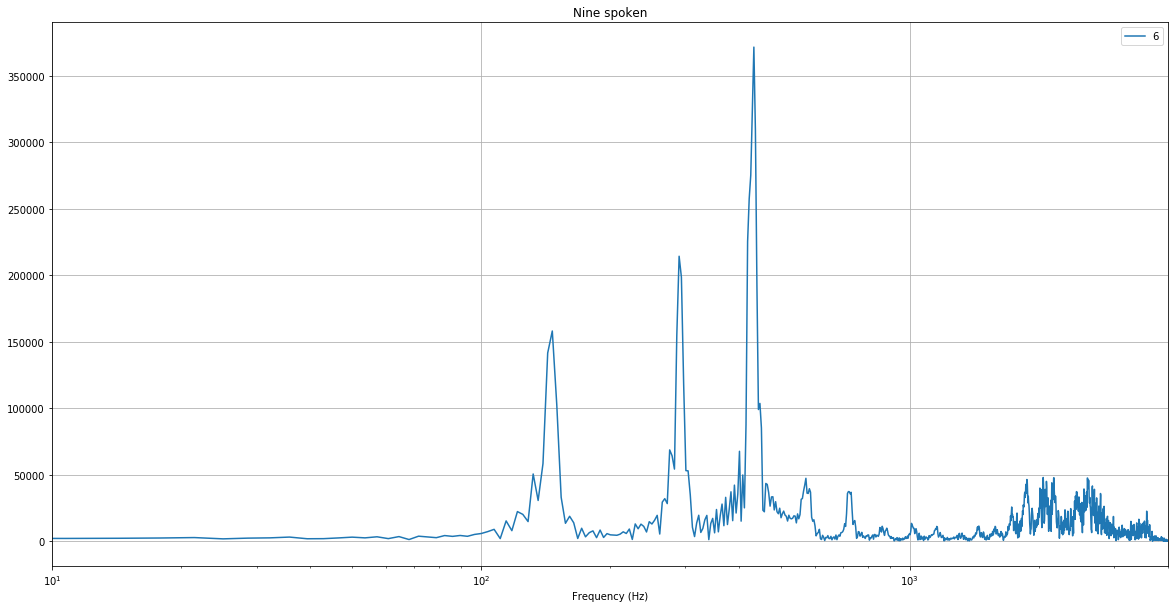

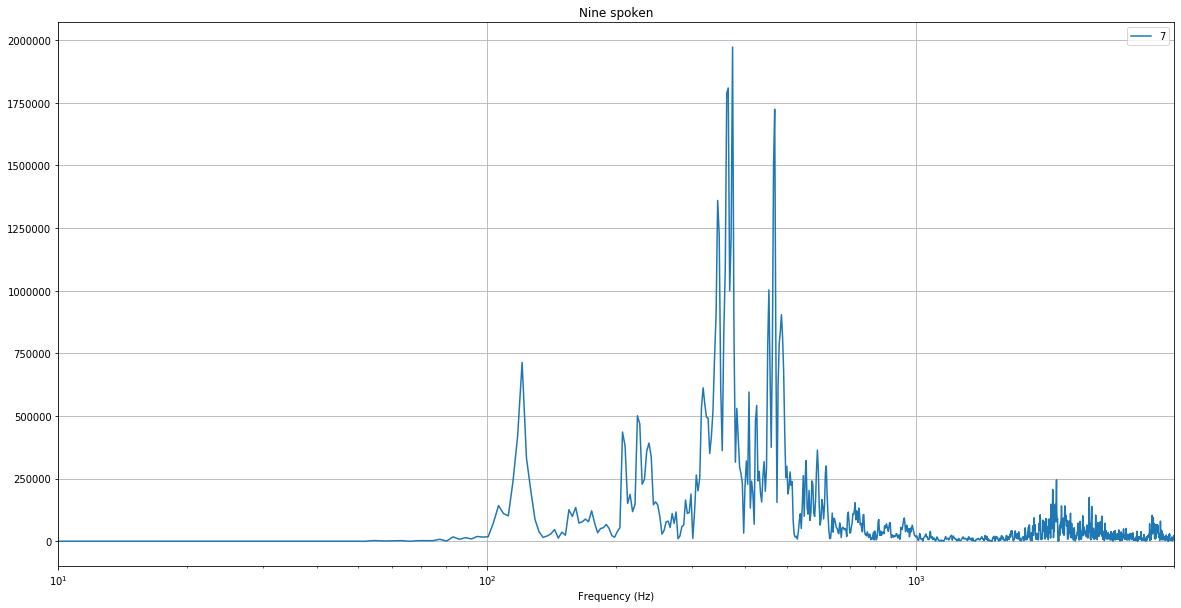

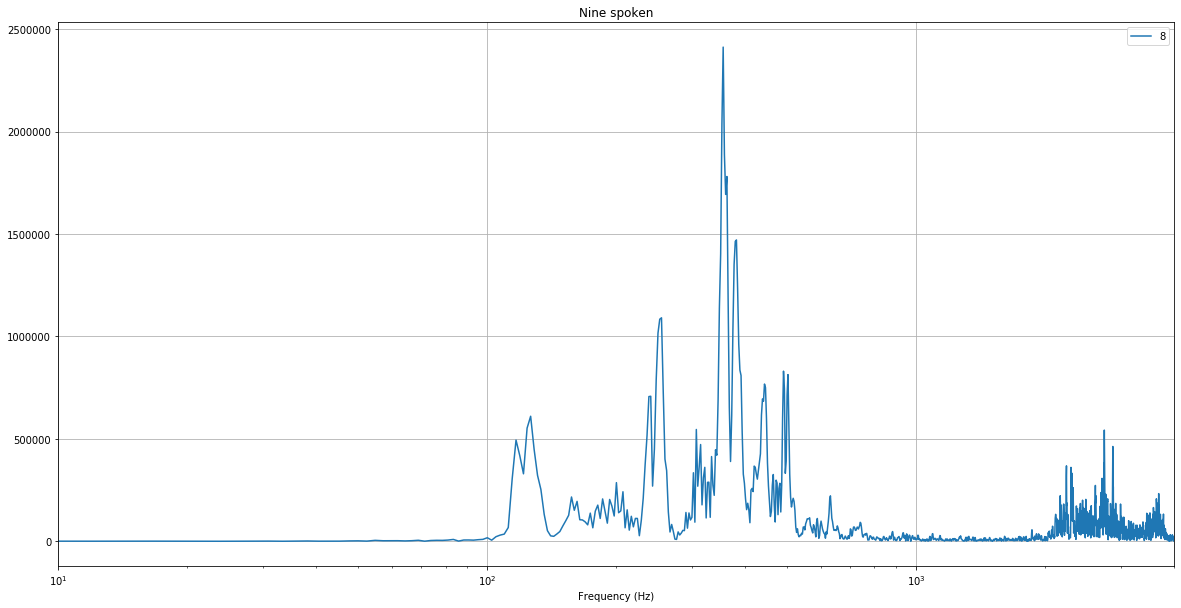

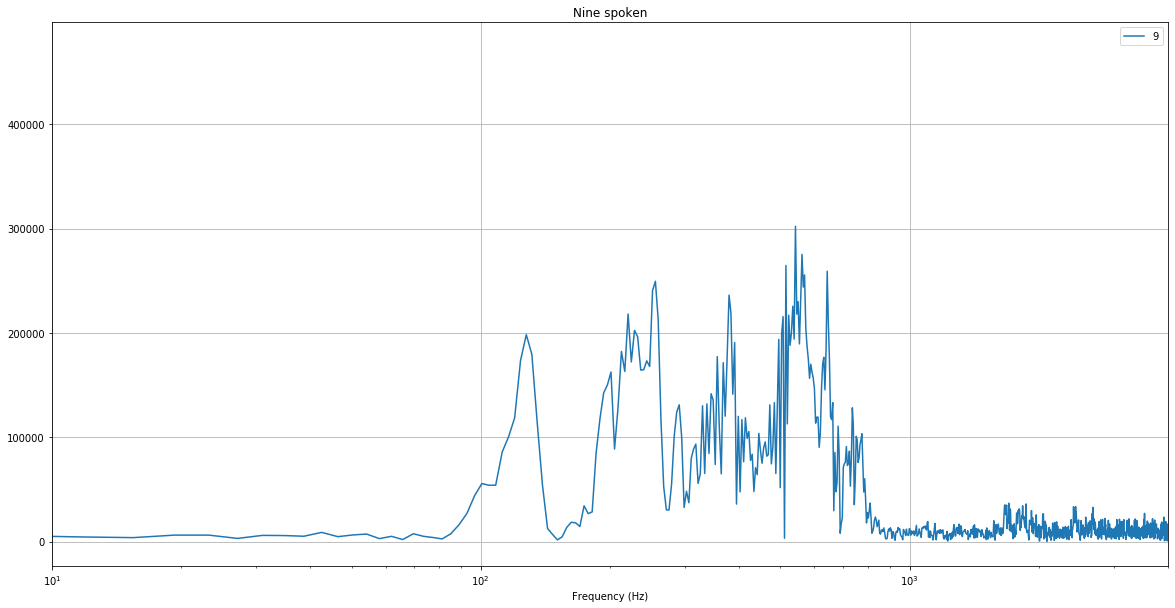

In [127]:
extract_frequencies(list_label_five)

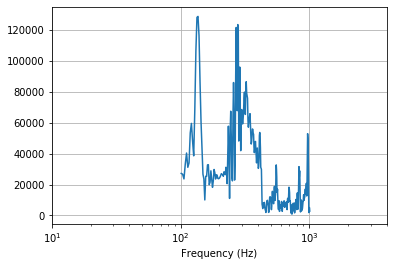

In [626]:
rate, data2 = scipy.io.wavfile.read('free-spoken-digit\\dev\\1201_5.wav')

samples2 = data2.shape[0]

datafft2 = fft(data2)
#Get the absolute value of real and complex component:
fftabs2 = abs(datafft2)
freqs2 = fftfreq(samples2,1/rate)

plt.xlim( [10, rate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs2[40:400],fftabs[40:400])

In [25]:
fftabs2

array([ 587.        , 4483.82271658, 2389.81851378, ..., 2712.64124099,
       2389.81851378, 4483.82271658])

## Result 1st frequency test
Plotting the graphs about the spoken digit between 0 and 9 i saw that when a digit is spoken, the further ones have the same frequencies shape, in particular we have 'n' maximums in the same position. The second consideration that i can see is that frequencies less than 10^2 are useless because are close to 0.
So i proceed by splitting in many intervals (after remove Hz < 100) and compute max over them.

In [11]:
def into_frequencies(clean_labeled_dataset):

    freq_dictionary = {}
    #i prepare data in a tuple (freqs, fftabs)

    for code, wav in zip(sorted(clean_labeled_dataset.keys()), clean_labeled_dataset.values()):
        samples = wav[1].shape[0]
        datafft = fft(wav[1])
        fftabs = abs(datafft)
        freqs = fftfreq(samples,1/wav[0])
        #to remove useless frequencies i take values starting from 40
        freq_dictionary[code] = (freqs[40:], fftabs[40:])
        
    return freq_dictionary    


In [50]:
freq_dictionary = into_frequencies(clean_labeled_dataset)

Now i modify the previous function to compute the maximum over a given # of intervals

In [13]:
def compute_vector_using_max(freq_dictionary, nPartitions):
    #i need not the frequency value in output but the x value --> in which frequency do i have the max??
    #So this fuction computes max in the intervall THEN it considers where the max is found
    X = {}
    
    for k,v in zip(freq_dictionary.keys(), freq_dictionary.values()):
        length = len(v[0])
        parts = []
        freqs = v[0]
        fftabs = v[1]
        for i in range(1,nPartitions):
            parts.append(int(length / nPartitions * i))
        #untill here splitting vector
        
        max_v = max(fftabs[:parts[0]])
        
        for i in range(len(fftabs[:parts[0]])):
            if v[1][i] == max_v:
                freq0 = freqs[i]
                break
        
        freq_array = []              
        freq_array.append(freq0)
        #untill here 1st value in vector
        
        for j in range(1,len(parts)-1):            
            max_p = max(fftabs[parts[j]:parts[j+1]])
            freq_star = 0

            for l in range(len(fftabs)):
                if fftabs[l] == max_p:
                    freq_star = freqs[l]
                     
                    break
            freq_array.append(freq_star)
            
        X[k] = np.array(freq_array)    
            
        
    return X   

In [14]:
X = compute_vector_using_max(freq_dictionary, 17)

In [51]:
X_mean = compute_vector_using_mean(freq_dictionary, 50)

## Evaluating result
### 1) Frequencies


In [44]:
X_train, X_test, y_train, y_test = train_test_split(list(X.values()), 
                                                    list(clean_id_label_dictionary.values()), test_size = 0.20)

#clf = DecisionTreeClassifier(max_depth=50, min_impurity_decrease= 0.001)
#clf.fit(X_train, y_train)
#y_test_pred = clf.predict(X_test)

#acc = accuracy_score(y_test, y_test_pred)
#print(f"Accuracy = {acc:.2f}")

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=550,  criterion='entropy', max_depth=24)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[23  0  1  1  0  1  2  2  0  1]
 [ 0  9  0  0  3  3  0  0  0  2]
 [ 0  0  8  1  0  0  0  1  1  0]
 [ 0  0  1  5  0  0  0  0  2  1]
 [ 0  1  0  0 13  1  0  0  1  0]
 [ 0  0  0  0  0 28  0  1  0  1]
 [ 1  0  0  0  1  0  6  1  2  0]
 [ 0  0  0  0  0  0  1 17  2  2]
 [ 0  0  0  1  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  2  1 22]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.90      0.53      0.67        17
           2       0.80      0.73      0.76        11
           3       0.62      0.56      0.59         9
           4       0.76      0.81      0.79        16
           5       0.85      0.93      0.89        30
           6       0.67      0.55      0.60        11
           7       0.71      0.77      0.74        22
           8       0.57      0.92      0.71        13
           9       0.76      0.88      0.81        25

    accuracy                           0.77       185
   macro avg       

### 2) Means

In [52]:
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(list(X_mean.values()), 
                                                    list(clean_id_label_dictionary.values()), test_size = 0.20)

In [54]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=550, criterion='entropy', max_depth=24)
clf.fit(X_train_mean, y_train_mean)
y_pred_mean = clf.predict(X_test_mean)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test_mean,y_pred_mean))
print(classification_report(y_test_mean,y_pred_mean))
print(accuracy_score(y_test_mean, y_pred_mean))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  1  0  0  1  0  1]
 [ 0  0  9  0  0  0  1  1  0  0]
 [ 1  0  1 11  0  0  0  0  0  0]
 [ 0  1  0  0 26  1  0  0  0  0]
 [ 0  0  0  0  0 24  0  1  0  2]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 1  0  0  0  0  1  0 28  0  0]
 [ 0  0  0  0  0  0  0  1 28  0]
 [ 0  0  0  0  0  0  0  0  0 25]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       0.94      0.83      0.88        18
           2       0.90      0.82      0.86        11
           3       1.00      0.85      0.92        13
           4       0.96      0.93      0.95        28
           5       0.92      0.89      0.91        27
           6       0.95      1.00      0.97        18
           7       0.88      0.93      0.90        30
           8       1.00      0.97      0.98        29
           9       0.89      1.00      0.94        25

    accuracy                           0.94       232
   macro avg       

The result is surely better than the previous one. Let's try to apply the model at the unlabeled dataset

# Apply the model

In [56]:
UNlabeled_recording_files = os.listdir('free-spoken-digit\\eval')

In [57]:
dataset_eval= {}

for string in UNlabeled_recording_files:
    wav = scipy.io.wavfile.read('free-spoken-digit\\eval\\'+string)
    wav_id = string.split('.')[0]
    #then insert it in the dataset
    dataset_eval[int(wav_id)] = wav

In [58]:
freq_eval_dict = into_frequencies(dataset_eval)

In [61]:
X_eval = compute_vector_using_mean(freq_eval_dict, 50)

In [62]:
y_final = clf.predict(list(X_eval.values()))

### Dump to file

In [63]:
import csv

def dump_to_file(filename, y_pred, dataset):
    with open(filename, mode="w", newline="") as csvfile:
        
        # Headers
        fieldnames = ['Id', 'Predicted']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for ids, cls in zip(dataset.keys(), y_pred):
            writer.writerow({'Id': str(ids), 'Predicted': str(cls)})

dump_to_file("result.csv", y_final, dataset_eval)
print("Computed Finished")

Computed Finished
